## Redes Neuronales - Trabajo Practico N°1 - Clasificación Multiclase
### Dataset Yeast 
es un dataset para construir un predictor de sitios específicos de anclaje de proteínas de levaduras basado en información de las secuencias de aminoácidos que forman a la proteína (problema de clasificación multiclase).

In [2]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
import pandas as pd
import src.functions as nn
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder
#import src.helper as helper
#import src.multiclass_helper as mc
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
columns = ["mcg","gvh","alm","mit","erl","pox","vac","nuc"]
df = pd.read_csv("data/yeast.data",names = ["Name"] + columns + ["Class"], sep='\s+')

#### Análisis exploratorio de datos (EDA)


In [5]:
df

,Name,mcg,gvh,alm,mit,erl,pox,vac,nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


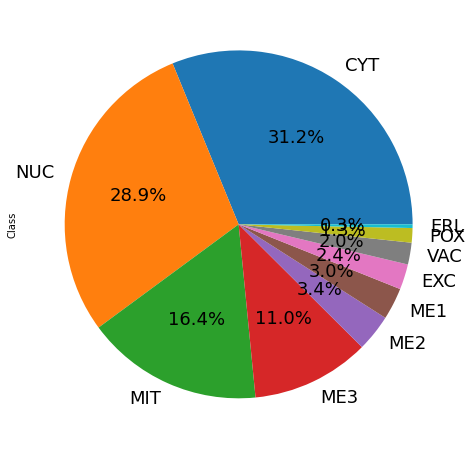

In [6]:
clases = df["Class"].drop_duplicates().to_list()
# for clase in clases:
#     num = df[df["Class"] == clase].shape[0]
#     prob = df[df["Class"] == clase].shape[0]/df.shape[0]
#     print(f"{clase} cantidad: {num} \t Probabilidad: P(X|Y=\"{clase}\") = {np.round(prob,3)}")

plot = df['Class'].value_counts().plot( kind='pie', autopct="%.1f%%", fontsize=18, figsize=(8, 8))

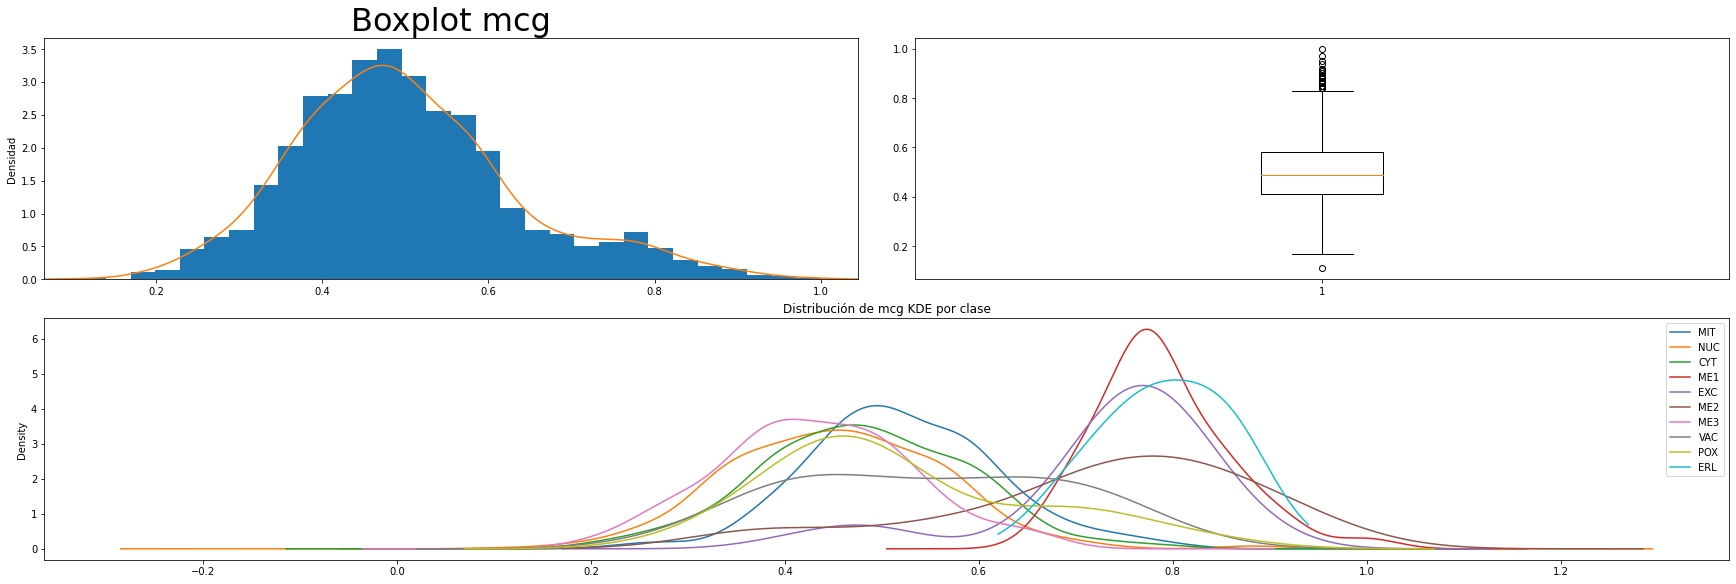

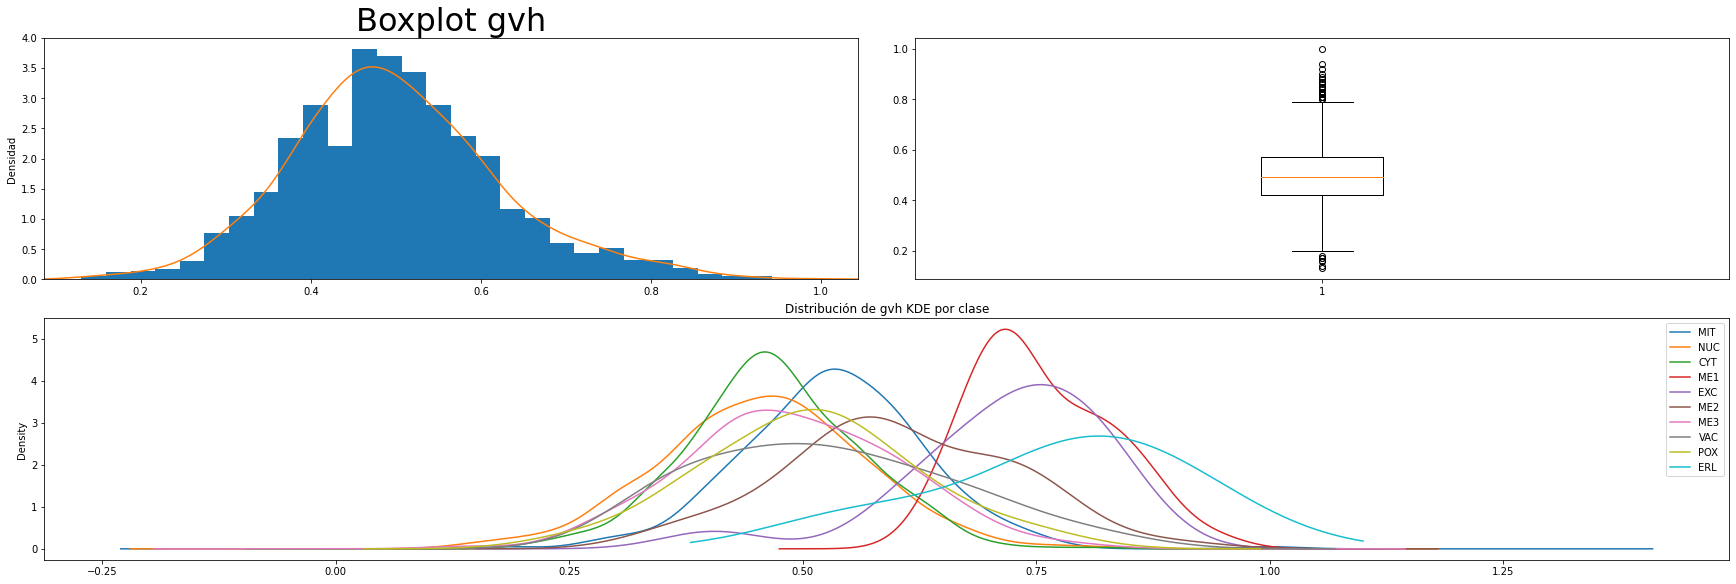

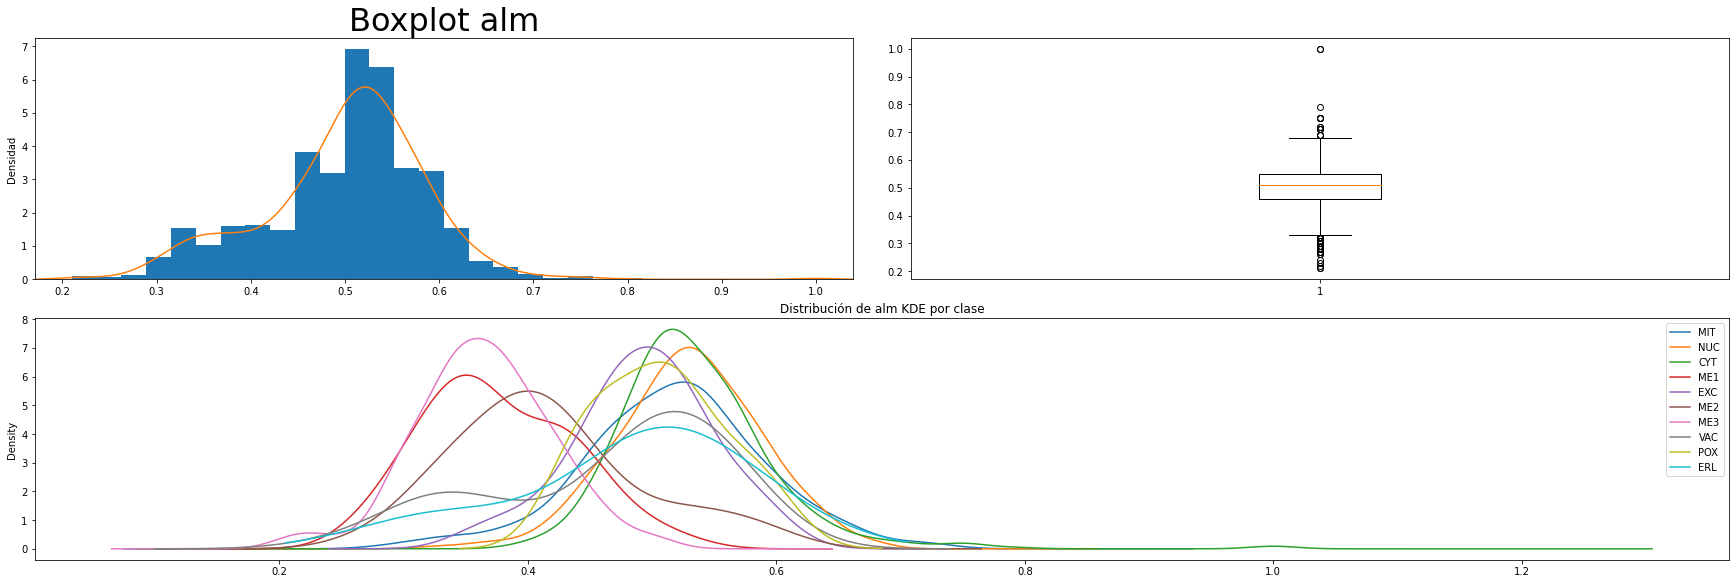

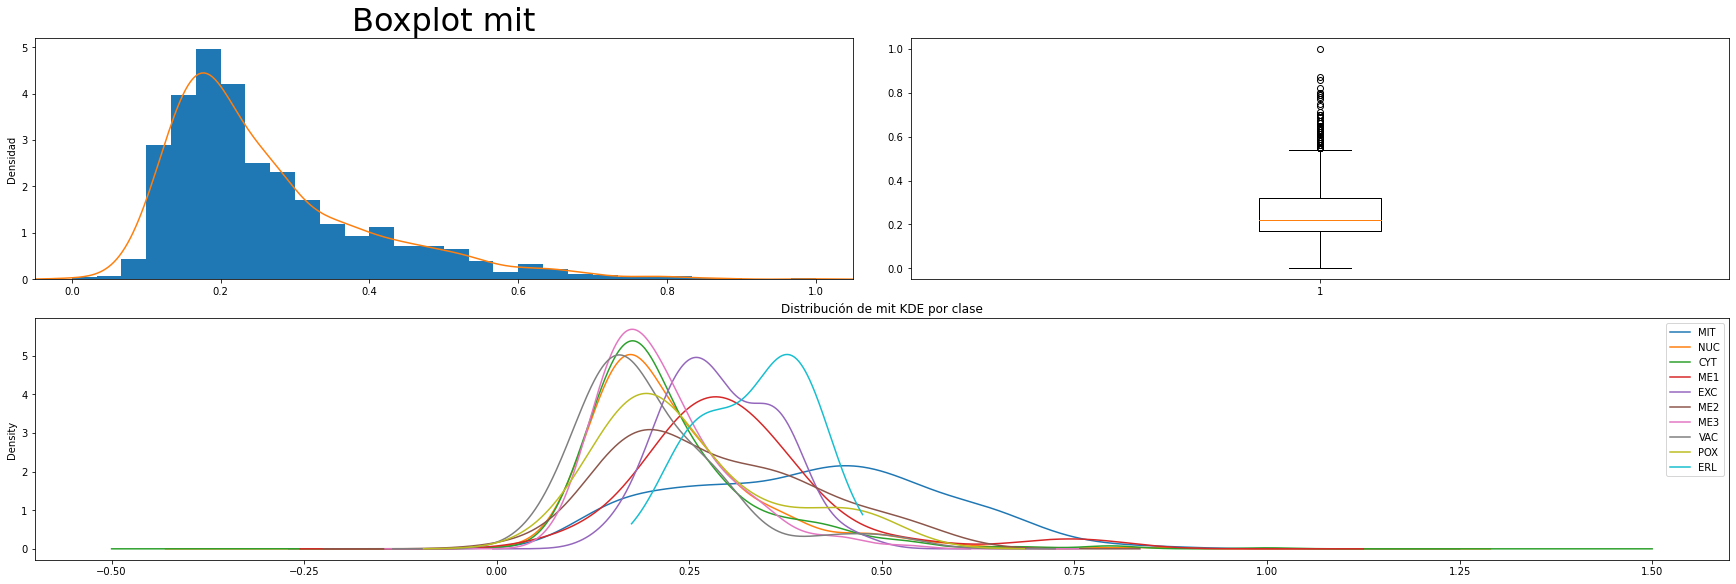

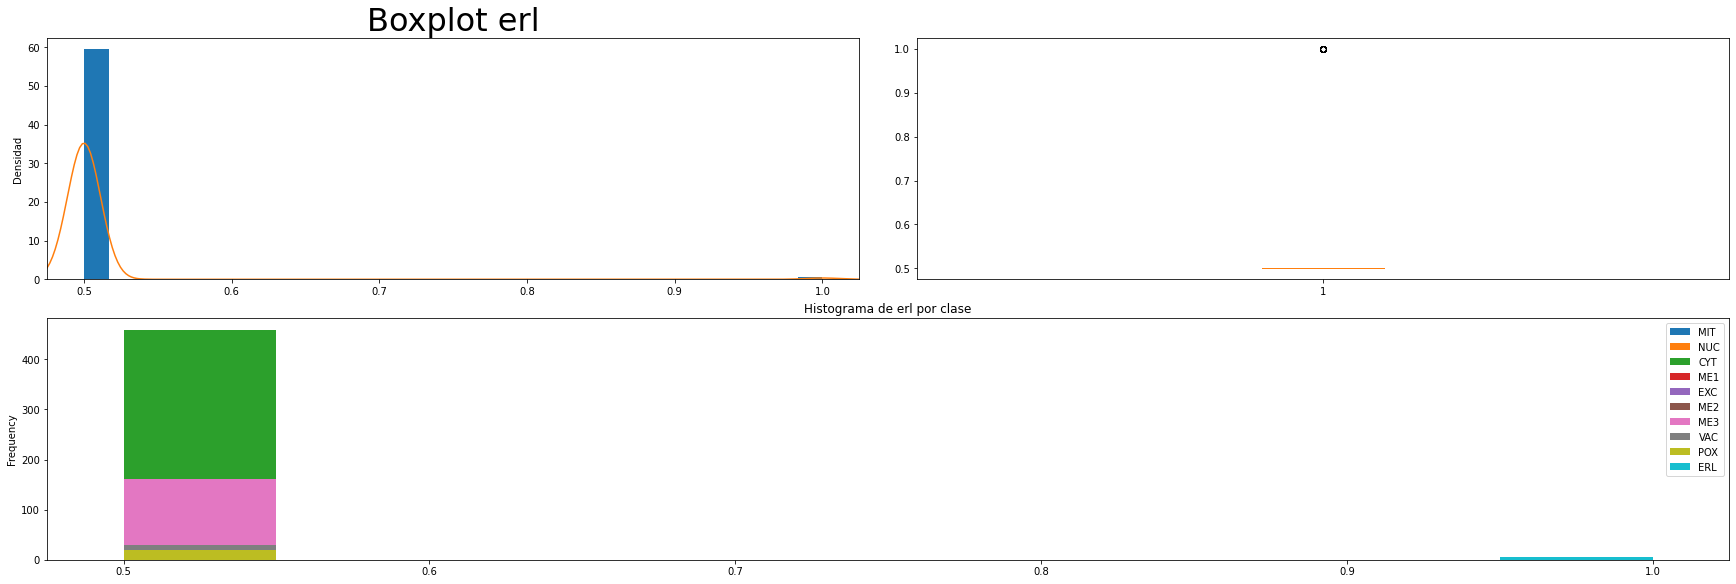

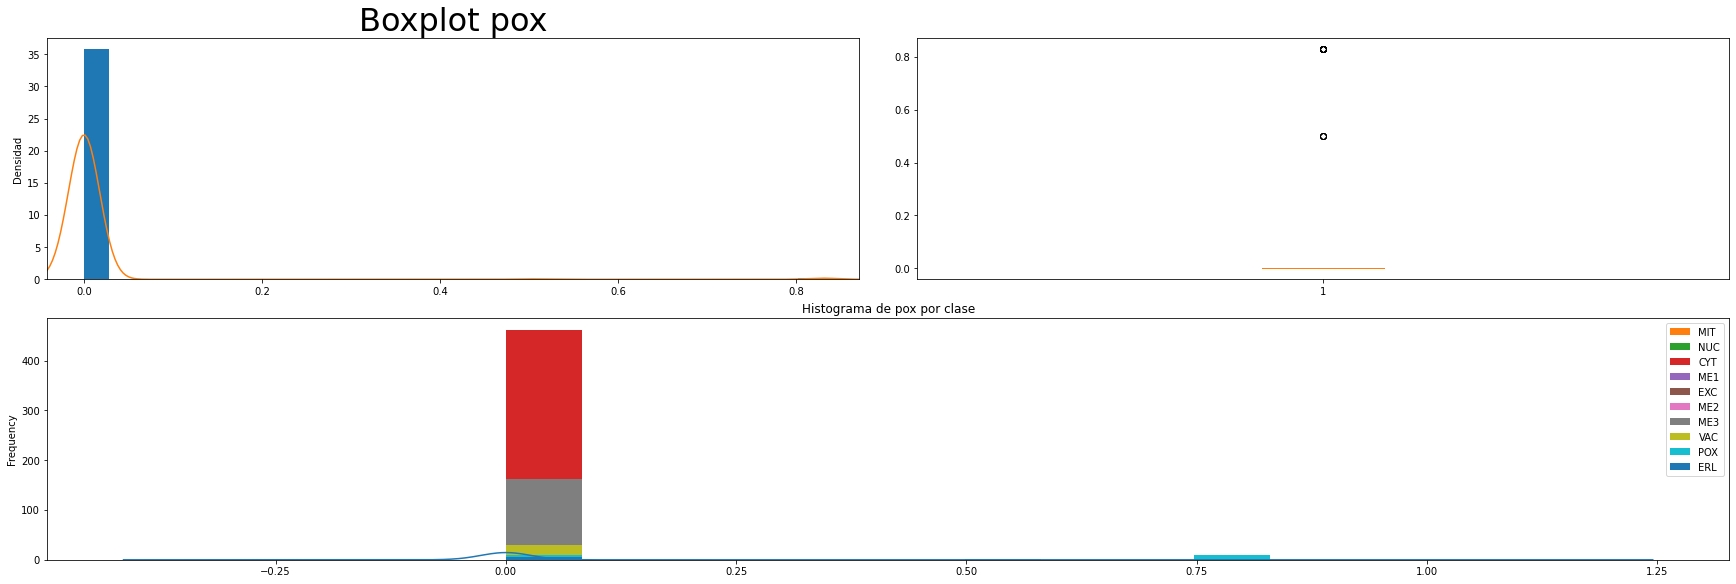

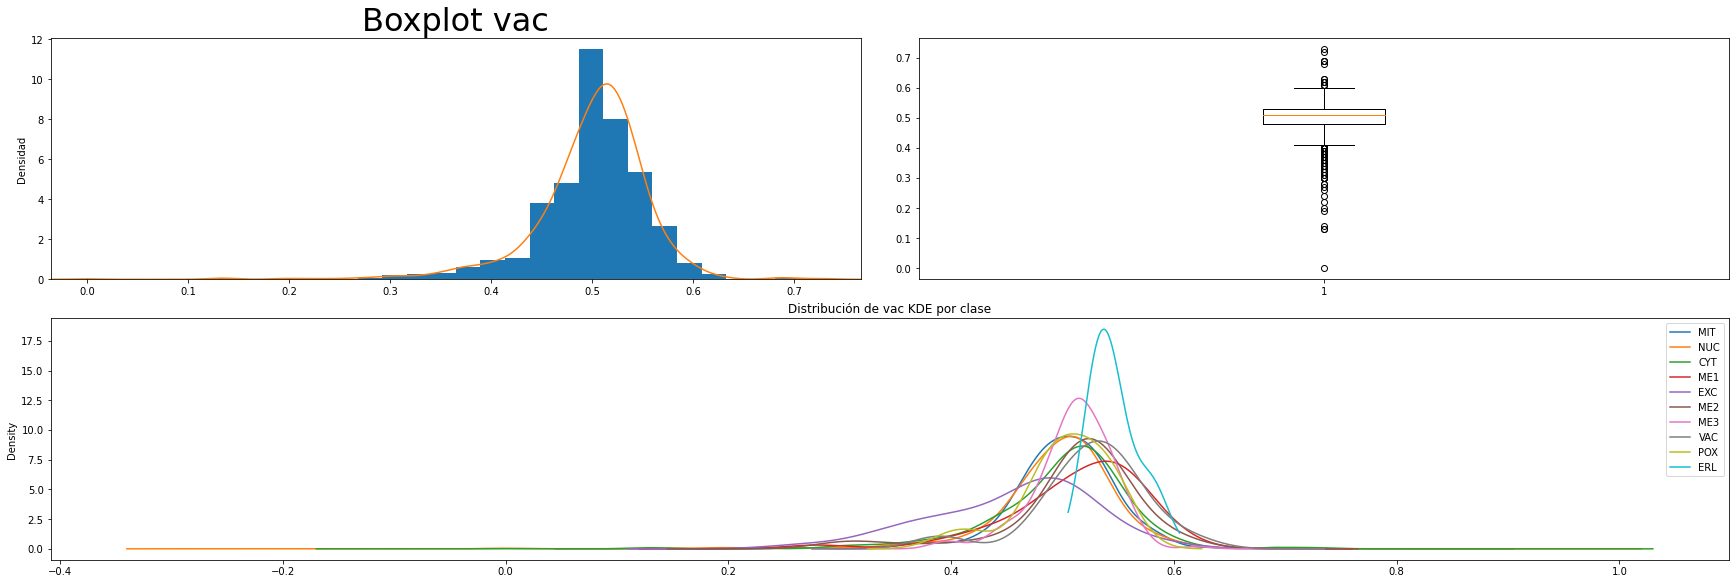

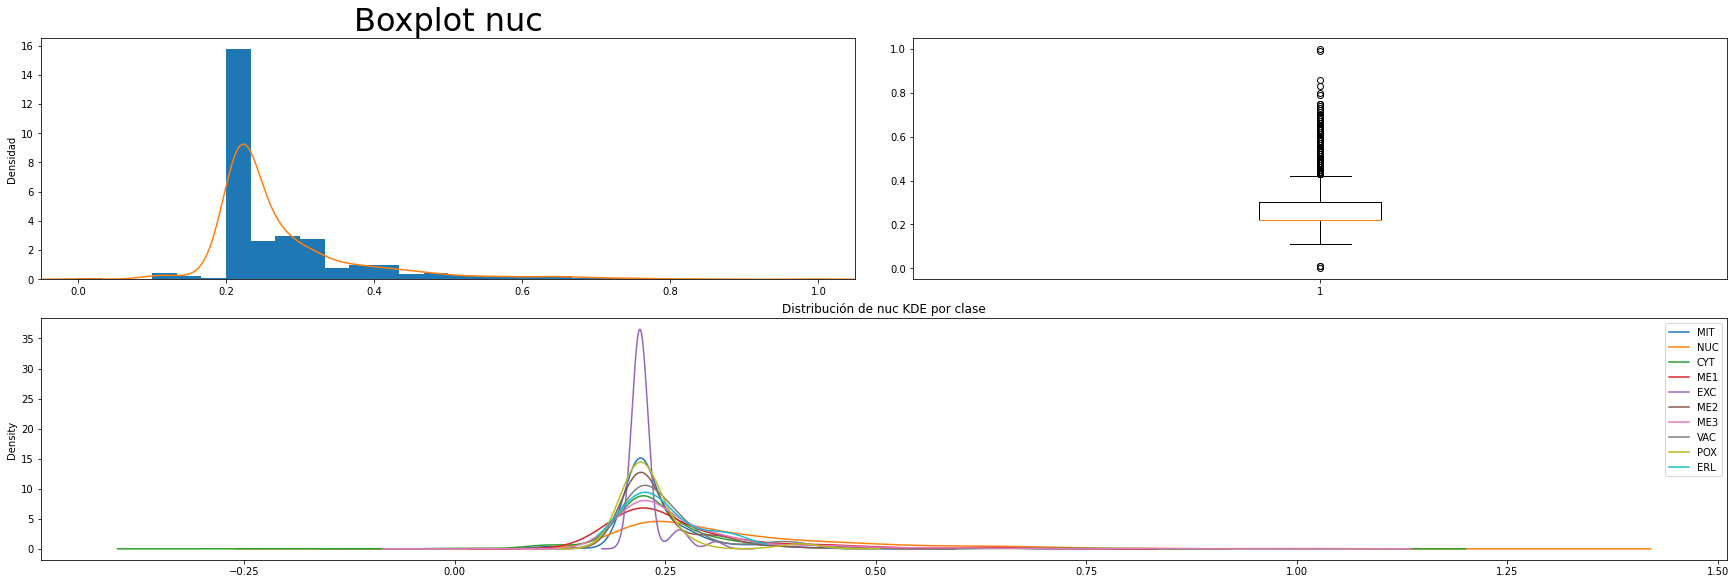

In [27]:
for c in columns:
    nn.compare_param(df,c,30,figsize=(24,8))

In [ ]:
df[df["Class"] == "MIT"].describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,244.000000,244.000000,244.000000,244.000000,244.0,244.000000,244.000000,244.000000
mean,0.521434,0.533238,0.517377,0.404426,0.5,0.008852,0.501680,0.240984
std,0.097238,0.098515,0.072926,0.165850,0.0,0.081364,0.046508,0.056980
min,0.230000,0.180000,0.290000,0.110000,0.5,0.000000,0.260000,0.110000
25%,0.460000,0.470000,0.470000,0.270000,0.5,0.000000,0.480000,0.220000
50%,0.510000,0.530000,0.520000,0.410000,0.5,0.000000,0.500000,0.220000
75%,0.582500,0.590000,0.560000,0.520000,0.5,0.000000,0.530000,0.250000
max,0.810000,1.000000,0.720000,0.870000,0.5,0.830000,0.690000,0.650000


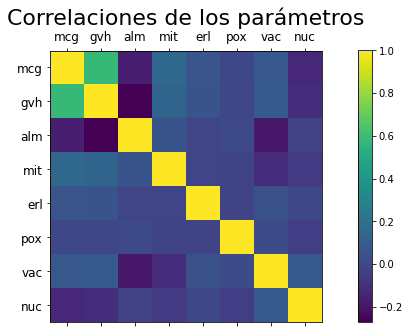

In [ ]:
nn.pretty_corr_matrix(df,title="Correlaciones de los parámetros",figsize=(13,5))

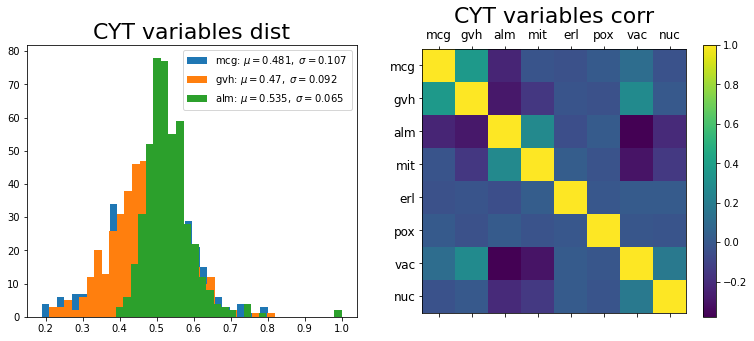

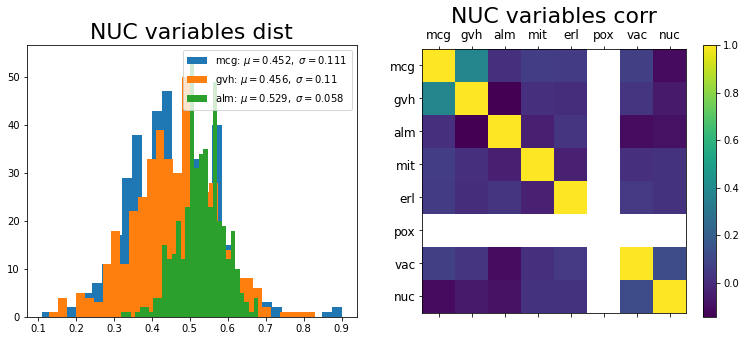

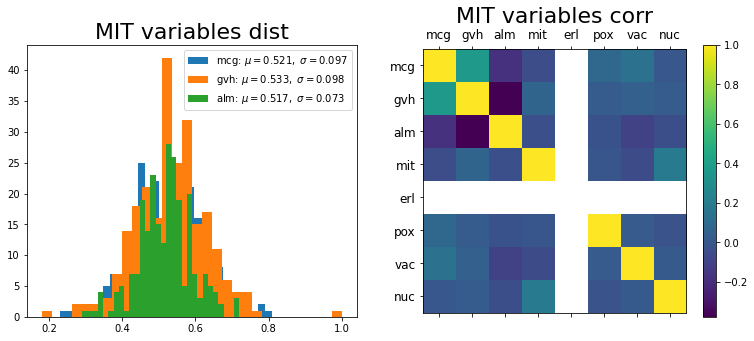

In [ ]:
#Suma?
nn.pretty_class_EDA(df,"CYT",["mcg","gvh","alm"],bins=30,figsize=(13,5))
nn.pretty_class_EDA(df,"NUC",["mcg","gvh","alm"],bins=30,figsize=(13,5))
nn.pretty_class_EDA(df,"MIT",["mcg","gvh","alm"],bins=30,figsize=(13,5))
# Los blancos son NaN que significan que no tienen correlación

In [ ]:
# nn.pretty_hist2d(df[df["Class"] == "MIT"],["mcg","gvh"],bins=20)
# nn.pretty_hist2d(df[df["Class"] == "NUC"],["mcg","gvh"],bins=20)
# nn.pretty_hist2d(df[df["Class"] == "CYT"],["mcg","gvh"],bins=20)

#### Modelo generativo

In [ ]:
probabilities = {}
for clase in clases:
    num = df[df["Class"] == clase].shape[0]
    probabilities[clase] = df[df["Class"] == clase].shape[0]/df.shape[0]

In [ ]:
results = []
testing = []
samples = df[columns].to_numpy()
sample_names = df["Class"].to_list()
for sample,class_name in zip(samples,sample_names):
    result = nn.get_class(sample,df,print_res=False)
    if result == class_name:
        results.append(True)
    else:
        results.append(False)
    testing.append(result)
print(f"Accuracy: {np.round(np.sum(results)/len(results)*100,3)}%")

Accuracy: 48.315%


In [ ]:
for c in clases:
    print(f"{c}:{np.round(testing.count(c)/len(testing)*100,3)}%")

MIT:5.795%
NUC:5.728%
CYT:73.518%
ME1:1.348%
EXC:1.819%
ME2:2.493%
ME3:9.097%
VAC:0.135%
POX:0.0%
ERL:0.067%
